In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy import stats
from scipy.io import loadmat
import scipy.io as sci
from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering
from skimage.measure import compare_ssim
from scipy.spatial.distance import cosine
%matplotlib inline
import cPickle
from eegtools.io import load_edf

ImportError: cannot import name compare_ssim

In [3]:
data = sci.loadmat('../s13_ICA_channelsFull.mat')['arr']
print len(data), len(data[0])

61 1805100


In [4]:
length_of_intervals = 30000
channels = 61
edges = 1891
total_interval = len(data[0])/length_of_intervals + 1
channels_data = [[None for j in range(edges)] for i in range(total_interval)] 

In [5]:
def calculate_pearson(interval):
    index_counter = 0
    x = length_of_intervals * interval
    y = x + length_of_intervals
    for start in range(channels):
        for index in range(start, channels):
            if interval != total_interval:
                channels_data[interval][index_counter] = compare_ssim(data[start][x:y], data[index][x:y])
            else:
                channels_data[interval][index_counter] = compare_ssim(data[start][x:], data[index][x:])
            index_counter += 1
    print index_counter

In [6]:
for i in range(total_interval):
    print 'Calculating Interval %s' % i,
    calculate_pearson(i)

Calculating Interval 0

NameError: global name 'compare_ssim' is not defined

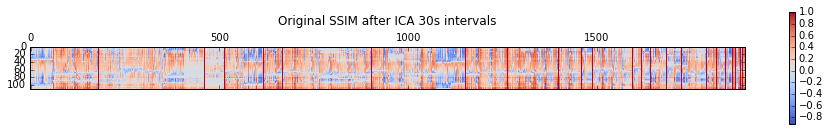

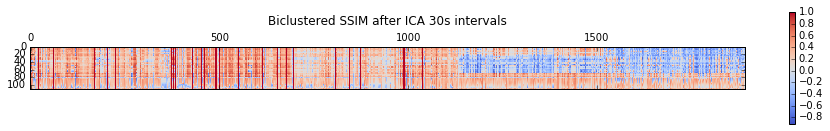

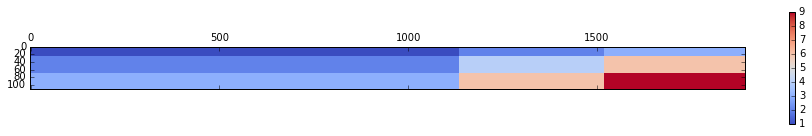

In [6]:
post_process_data = np.array(channels_data)
spectral_model = SpectralBiclustering()
spectral_model.fit(post_process_data)
fit_data = post_process_data[np.argsort(spectral_model.row_labels_)]
fit_data = fit_data[:, np.argsort(spectral_model.column_labels_)]
plt.matshow(post_process_data, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.title('Original SSIM after ICA 30s intervals\n')
plt.savefig('../media/json/ssim/ICA/ssim_ICA_30s.png')
plt.matshow(fit_data, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.title('Biclustered SSIM after ICA 30s intervals\n')
plt.savefig('../media/json/ssim/ICA/ssim_ICA_bicluster_30s.png')
plt.matshow(np.outer(np.sort(spectral_model.row_labels_) + 1,
                     np.sort(spectral_model.column_labels_) + 1),
            cmap=plt.cm.coolwarm)
plt.colorbar()

In [7]:
import json as simplejson
with open('../media/json/ssim/ICA/ICA-matrix-30s.json', 'w+') as f:
    p = [[float(column) for column in row] for row in post_process_data]
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': p}))

cols = np.argsort(spectral_model.column_labels_)
rows = np.argsort(spectral_model.row_labels_)
indices_matrix = []   
for row in rows:
    for col in cols:
        indices_matrix.append((float(row),float(col)))

with open('../media/json/ssim/ICA/fitted-indices-ICA-pearson-30s.json', 'w+') as f:
    f.write(simplejson.dumps({'name': 's5d2nap', 'data': indices_matrix}))

# with open('C:\Users\Fioger\Desktop\eeg-viz\postprocess/pearson/z_score/z_score_pearson_30s_dump.dump', 'wb') as f:
#     cPickle.dump(channels_data, f)